**Lab 04**
- Full Dataset Link: https://www.kaggle.com/code/arminfuchs/skin-cancer-with-cnn/data
- Image processing
- Dimensionality reduction


#Unzip Data

In [ ]:
!unzip /content/SkinCancerDataset.zip

#Imports

In [ ]:
import os
import cv2 
import matplotlib.pyplot as plt

#Load Data

In [ ]:
os.listdir("/content/SkinCancerDataset/")

['ISIC_0026765.jpg',
 'ISIC_0000141.jpg',
 'ISIC_0025046.jpg',
 'ISIC_0000144.jpg',
 'ISIC_0024326.jpg',
 'ISIC_0000142.jpg',
 'ISIC_0010810.jpg',
 'ISIC_0000028.jpg']

In [ ]:
imgs = os.listdir("/content/SkinCancerDataset/") # listing what is inside the directory
lst = []
for path in imgs:
  img = cv2.cvtColor(cv2.imread("/content/SkinCancerDataset/"+path), cv2.COLOR_BGR2RGB)
  lst.append(img)

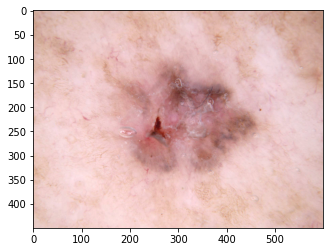

In [ ]:
plt.imshow(lst[0])

In [ ]:
def Display_images(images_lst):
  fig, axes = plt.subplots(1,8,figsize=(25,20),  # 1,8 =>  1 row and 8 columns
  subplot_kw={'xticks':[], 'yticks':[]},         # xticks , yticks => what will be showen in x axis and y axis
  gridspec_kw=dict(hspace=0.05, wspace=0.05)     # hspace , wspace => Spaces between images
  )
  for i, ax in enumerate(axes.flat):
    ax.imshow(images_lst[i],cmap='gray')

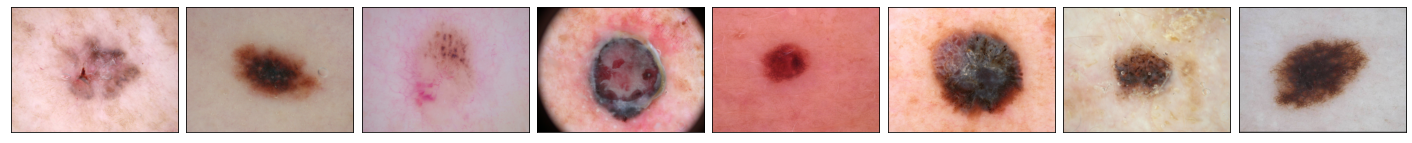

In [ ]:
Display_images(lst)

#Resize Images
Images fed to our AI algorithm should not vary in size, therefore, we should establish a base size for all images fed into our AI algorithms.

In [ ]:
def resize(images_lst,width,height):
  res_img = []
  for img in images_lst:
    img = cv2.cvtColor(img , cv2.COLOR_RGB2GRAY)
    res = cv2.resize(img,  (width, height) )
    res_img.append(res)
  return res_img

In [ ]:
resized_images = resize(lst,224,224)

In [ ]:
resized_images[0].shape

(224, 224)

#Remove Noise
To smooth the images to remove unwanted noise. we will use gaussian blur.
- Gaussian blur : also known as Gaussian smoothing is the result of blurring an image by a Gaussian function.

In [ ]:
def remove_noise(images_lst):
  no_noise = []
  for i in range(len(images_lst)):
    blur = cv2.GaussianBlur(images_lst[i], (5, 5), 0)  # (5, 5) => Kernel size
    no_noise.append(blur)
  return no_noise

In [ ]:
no_noise = remove_noise(resized_images)

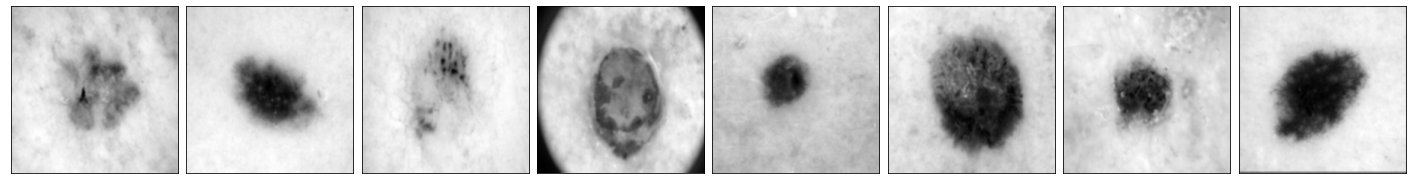

In [ ]:
Display_images(no_noise)

#Image Enhancement
 Contrast Limited Adaptive Histogram Equalization
 - Enhance the overall quality of the medical image for feature visualization and clinical measurement

- https://docs.opencv.org/3.4/d5/daf/tutorial_py_histogram_equalization.html

In [ ]:
def Image_enhancement(images_lst):
  enhanced = []

  # clipLimit: threshold for contrast limiting 
  # tileGridSize: Divides the input image into M x N tiles and then applies histogram equalization to each local tile
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4,4))  # Instantiate the CLAHE algorithm
  
  for img in images_lst:
    enhanced_img = clahe.apply(img)  # apply histogram equalization
    enhanced.append(enhanced_img)
  return enhanced

In [ ]:
Enhanced_images = Image_enhancement(no_noise)

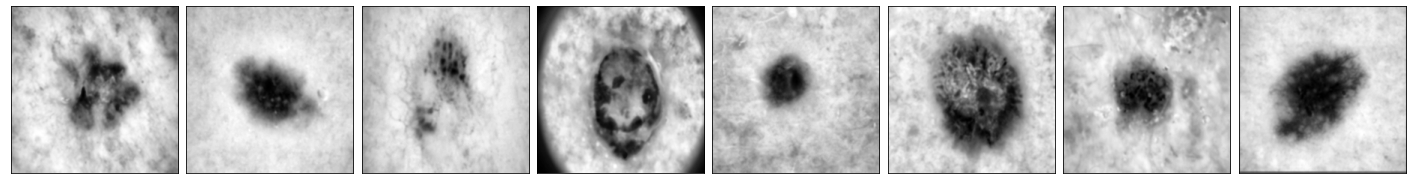

In [ ]:
Display_images(Enhanced_images)

#Image Augmentation
- https://github.com/aleju/imgaug#documentation

In [ ]:
!pip install imgaug

In [ ]:
from imgaug import augmenters as aug_lib

In [ ]:
img = Enhanced_images[7]

**Original Image**

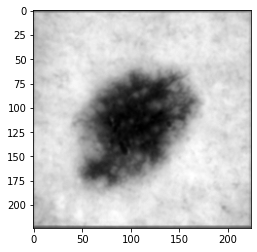

In [ ]:
plt.imshow(img,cmap='gray')

**Rotate**

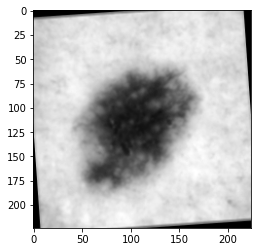

In [ ]:
rotate = aug_lib.Affine(rotate=(-25, 25))
image_aug = rotate(image=img)
plt.imshow(image_aug,cmap='gray')

**Crop and Pad**

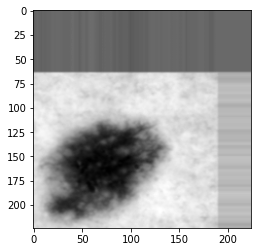

In [ ]:
CropAndPad = aug_lib.CropAndPad(percent=(-0.4, 0.4), pad_mode="edge")
image_aug = CropAndPad(image=img)
plt.imshow(image_aug,cmap='gray')

#**The Whole pipeline**

- Resize Image

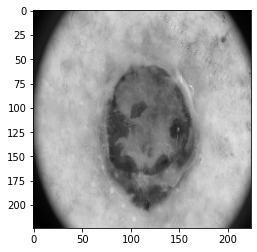

In [ ]:
plt.imshow(resized_images[3],cmap='gray')

- Remove Noise

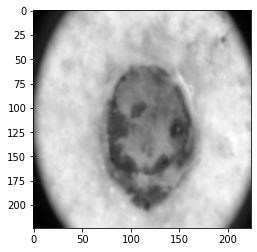

In [ ]:
plt.imshow(no_noise[3],cmap='gray')

- Enhanced Image

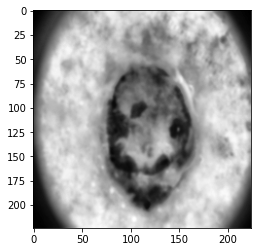

In [ ]:
plt.imshow(Enhanced_images[3],cmap='gray')

#**Lab Task**
- Use PCA (Principal component analysis) to reduce dimentions of one of the images in the data
 - PCA can help us improve performance at a very low cost of model accuracy.
 - It can also be used in reduction of noise in the data, feature selection (to a certain extent), and the ability to produce independent, uncorrelated features of the data.